<a href="https://colab.research.google.com/github/potdarjs/DSM-Project-7-Churn-Prediction/blob/master/DSM_Project_7_Telecom_Customer_Churn_PRediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Science Masters - Project 7
# Telecom Customer Churn Prediction

## Contents

- <a href='#1'>1. Introduction </a>
- <a href='#2'>2. Problem statement </a>
- <a href='#3'>3. Data Source  </a>
- <a href='#4'>4. Data Description </a>
- <a href='#5'>5. Identify the target variable</a>
- <a href='#6'>6. Read the data </a>
- <a href='#7'>7. Inspect the data </a> 
     - <a href='#7.1'> Check few samples</a>
     - <a href='#7.1'> Check the data types</a>
     - <a href='#7.1'> Check the initial summary</a>
- <a href='#7'>8. Data Manipulation  </a>   
     - <a href='#8.1'> Check for missing values</a>
     - <a href='#8.2'> Column string fomatting </a>
     - <a href='#8.3'> Data fomatting </a>
     - <a href='#8.4'> Imputation </a>
- <a href='#9'>9. Exploratory Data Analysis</a>
    - <a href='#9.1'> univariate analysis </a>
    - <a href='#9.2'> class ditribution in data</a>
    - <a href='#9.3'> Varibles distribution according to class</a>
    - <a href='#9.4'> Bucketing </a>
    - <a href='#9.5'> Correlation Matrix</a>
    - <a href='#9.6'> feature elimination / addition / transformation </a>
- <a href='#10'>10. Data preprocessing</a>
    - <a href='#10.1'> Encoding categorical variable </a>
    - <a href='#10.2'> Normalizing features </a>
    - <a href='#10.3'> spliting train/val/test data </a>
    - <a href='#'> feature compression </a>
- <a href='#11'>11. Model Building</a>
    - <a href='#11.1'> Baseline Model</a>
    - <a href='#11.2'> Model Selection </a>
    - <a href='#11.3'> Hyper parameter Selection </a>
- <a href='#12'>12. Model Performances</a>
    - <a href='#12.1'> model performance metrics</a>
    - <a href='#12.2'> Compare model metrics</a>
    - <a href='#12.3'> Confusion matrices for models</a>
    - <a href='#12.4'> ROC - Curves  for models</a>
    - <a href='#12.5'> Precision recall curves</a>
- <a href='#13'>13. Model Interpretation</a>
- <a href='#14'>14. Model Deployment</a>


# <a id='1'>1.Introduction</a>

We have the customer data for a **telecom** company which offers many services like phone, internet, TV Streaming and Movie Streaming.  The telecommunications company is concerned about the number of customers leaving their landline business for cable competitors. They need to understand who is leaving. Imagine that you’re an analyst at this company and you have to find out who is leaving and why.

# <a id='2'>2.Problem Statement</a>


"Find the Best model to predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs."


# <a id='3'>3. Data Source </a>

Available at : [IBM watson analytics page](https://community.watsonanalytics.com/wp-content/uploads/2015/03/WA_Fn-UseC_-Telco-Customer-Churn.csv?cm_mc_uid=14714377267115403444551&cm_mc_sid_50200000=12578191540344455127&cm_mc_sid_52640000=36692891540344455130)


# <a id='4'>4. Data Description </a>

This data set provides info to help you predict behavior to retain customers.
The data set includes information about:

Customers who left within the last month – the column is called Churn

Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

Demographic info about customers – gender, age range, and if they have partners and dependents

We have to analyze all relevant customer data and develop focused customer retention programs.

# <a id='5'>5. Identify the target variable </a>

The Goal is to predict whether or not a particular customer is likely to retain services. This is represented by the Churn column in dataset. Churn=Yes means customer leaves the company, whereas Churn=No implies customer is retained by the company.

# <a id='6'>6. Read the data </a>

In [0]:
# Import Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas import read_csv
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from google.colab import drive

In [0]:
# Warnings Library - Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [0]:
from google.colab import files
uploaded = files.upload()
import io


Saving WA_Fn-UseC_-Telco-Customer-Churn.csv to WA_Fn-UseC_-Telco-Customer-Churn.csv


In [0]:
df = pd.read_csv(io.StringIO(uploaded['WA_Fn-UseC_-Telco-Customer-Churn.csv'].decode('utf-8')))

# <a id='7'>7. Inspect the data </a>

Lets have the feel of the dataset by looking at the variables and some values

In [0]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


The data set includes information about:

Customers who left within the last month – the column is called Churn

Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies

Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges

Demographic info about customers – gender, age range, and if they have partners and dependents

We have to analyze all relevant customer data and develop focused customer retention programs.

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

The data provided is of total 7043 Customers. 
There are toal 21 variables which includes the Target Variable (Churn). It has mixed type of variables with Nil Null values in the data set.

There needs some transformation of variable type stored as.

'SeniorCitizen' should be object instead of int64 as it is categorical variable

'TotalCharges' should be float64 instead of object as it is a continuous variable


# <a id='8'>8. Data Manipulation </a>


### Correct the variable type

In [0]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype(object)

In [0]:
df['TotalCharges'] = df['TotalCharges'].replace(r'\s+', np.nan, regex=True)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [0]:
df['tenure'] = df['tenure'].astype(float)

Let us have relook at all columns

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null object
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null float64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7032 non-null float64
Churn               7043 non-null object
dtypes: float64(3), object(18

### Null Values

In [0]:
# Check Null values and its percentage of total observations
df_null = pd.DataFrame({'total_null_values': df[:].isna().sum(), 'null_percentage': (df[:].isna().sum()/df.shape[0])*100})
df_null 

,null_percentage,total_null_values
customerID,0.000000,0
gender,0.000000,0
SeniorCitizen,0.000000,0
Partner,0.000000,0
Dependents,0.000000,0
tenure,0.000000,0
PhoneService,0.000000,0
MultipleLines,0.000000,0
InternetService,0.000000,0
OnlineSecurity,0.000000,0


It is seen now that 'TotalCharges ' has 11 null values. **every missing value record comes from customers who has not opted out**. Since there would some data loss by dropping observations with null values, we decide to impute and replace none with mean.

** Imputation **

In [0]:
df['TotalCharges'] = df['TotalCharges'].fillna((df['TotalCharges'].mean()))

In [0]:
df.isnull().sum().sum()

0

### Now there are no null values. Hence we can proceed further with the analysis

In [0]:
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2265.000258
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1400.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [0]:
df.describe(include=object)

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,5199-FPUSP,Male,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


# <a id='9'>9. Exploratory Data Analysis </a>

In [0]:
df_categorical = df.select_dtypes(include=object)

column_categorical = df_categorical.columns

In [0]:
df_categorical.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,7590-VHVEG,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,5575-GNVDE,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,3668-QPYBK,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,7795-CFOCW,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,9237-HQITU,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [0]:
df_numerical = df.select_dtypes(include=np.float)

column_numerical = df_numerical.columns

In [0]:
df_numerical.head()

,tenure,MonthlyCharges,TotalCharges
0,1.0,29.85,29.85
1,34.0,56.95,1889.50
2,2.0,53.85,108.15
3,45.0,42.30,1840.75
4,2.0,70.70,151.65


### <a id='9.1'> Univariate Analysis</a>

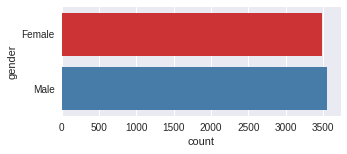

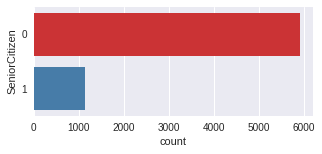

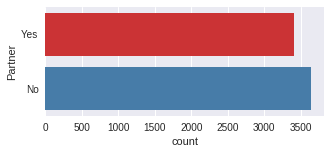

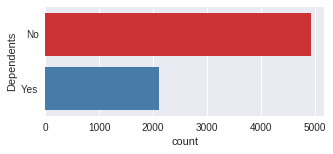

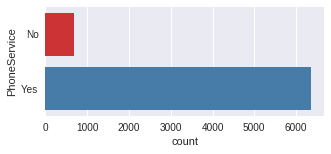

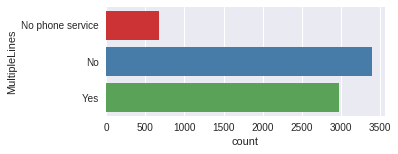

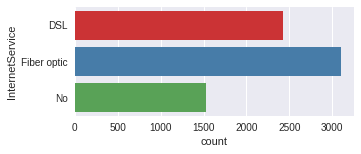

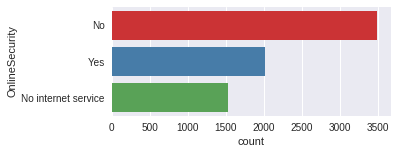

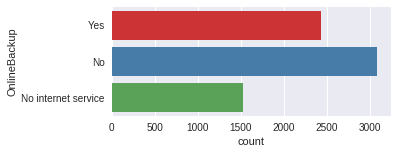

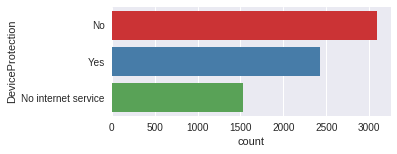

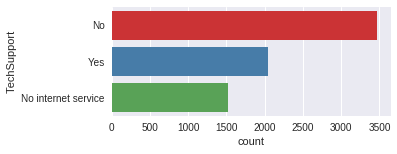

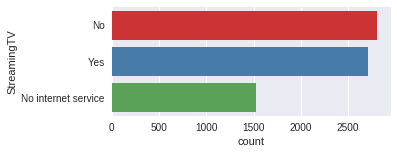

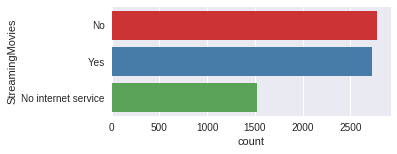

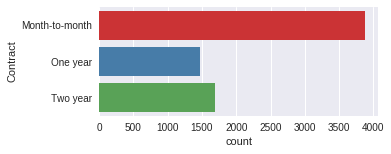

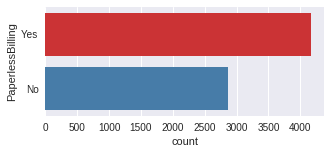

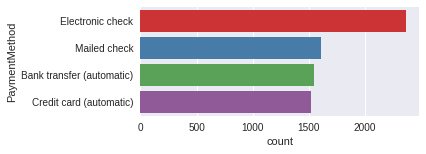

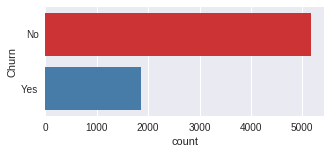

In [0]:
for i, col in enumerate(df_categorical.drop('customerID', axis=1).columns):
        plt.figure(i,figsize = (5,2))
        sns.countplot(y=col, data=df_categorical.drop('customerID', axis=1),palette='Set1')

We can do it by writing a function that plots the count or distribution of each column in the dataframe based on specified inputs
     @Args
       df: pandas dataframe
       col_to_exclude: specific column to exclude from the plot, used for excluded key 
       object_mode: whether to plot on object data types or not (default: True)
        Return
       No object returned but visualized plot will return based on specified inputs

In [0]:
def display_plot(df, col_to_exclude, object_mode = True):
    """ 
     This function plots the count or distribution of each column in the dataframe based on specified inputs
     @Args
       df: pandas dataframe
       col_to_exclude: specific column to exclude from the plot, used for excluded key 
       object_mode: whether to plot on object data types or not (default: True)
       
     Return
       No object returned but visualized plot will return based on specified inputs
    """
    n = 0
    this = []
    
    if object_mode:
        nrows = 4
        ncols = 4
        width = 20
        height = 20
    
    else:
        nrows = 2
        ncols = 2
        width = 14
        height = 10
    
    
    for column in df.columns:
        if object_mode:
            if (df[column].dtypes == 'O') & (column != col_to_exclude):
                this.append(column)                      
        else:
            if (df[column].dtypes != 'O'):
                this.append(column)
     
    
    fig, ax = plt.subplots(nrows, ncols, sharex=False, sharey=False, figsize=(width, height))
    for row in range(nrows):
        for col in range(ncols):
            if object_mode:
                g = sns.countplot(df[this[n]], ax=ax[row][col]) 
            else:
                g = sns.distplot(df[this[n]], ax = ax[row][col])


            
            ax[row,col].set_title("Column name: {}".format(this[n]))
            ax[row, col].set_xlabel("")
            ax[row, col].set_ylabel("")
            n += 1
    plt.show();
    return None


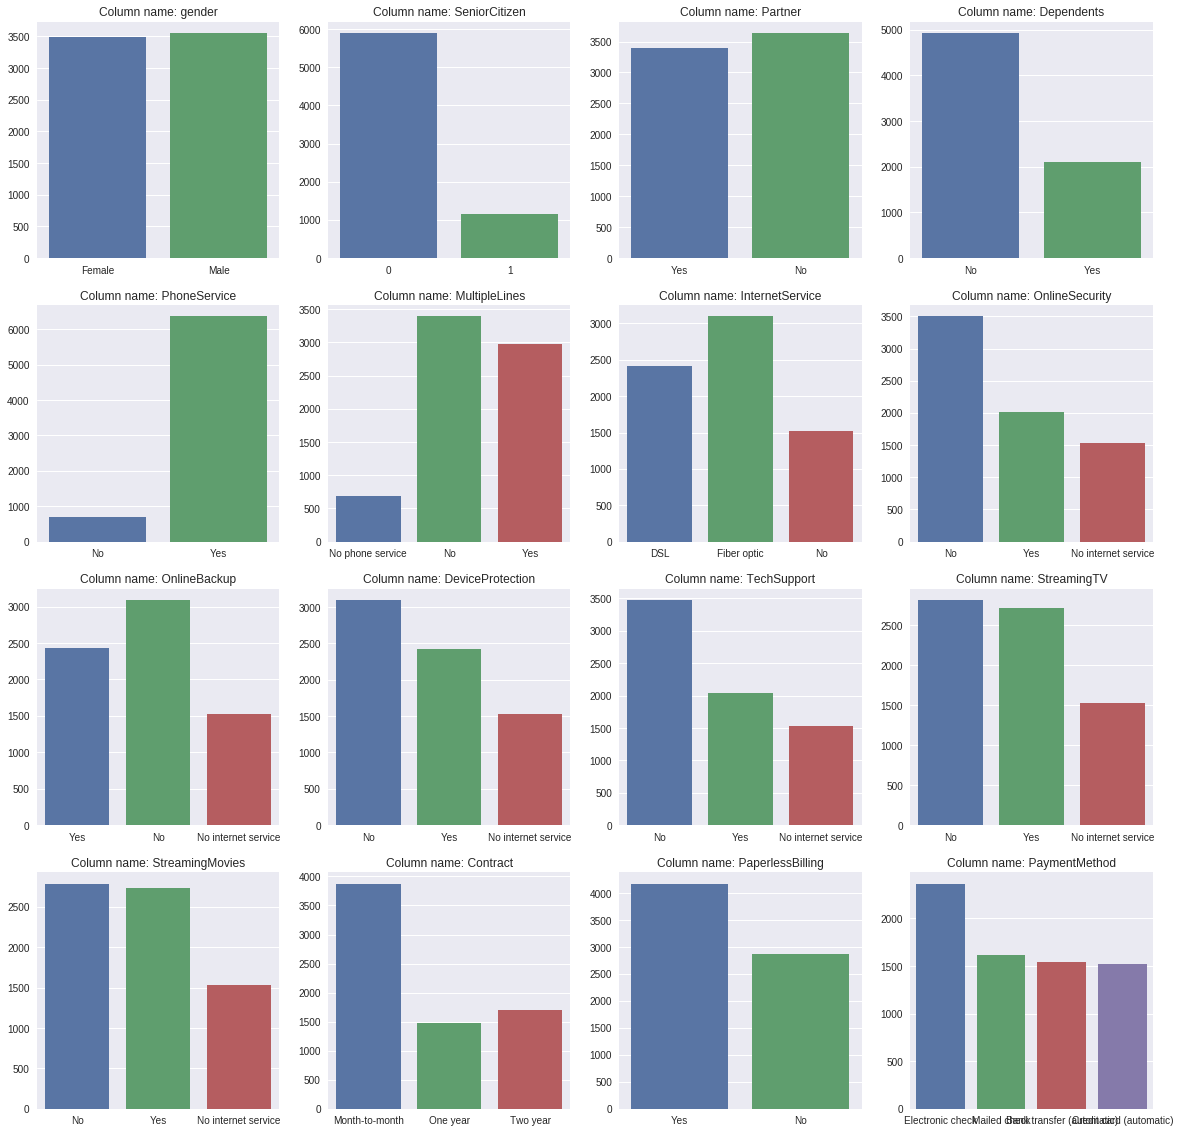

In [0]:
display_plot(df_categorical, 'customerID', object_mode = True)

Distribution of Numerical Variables 

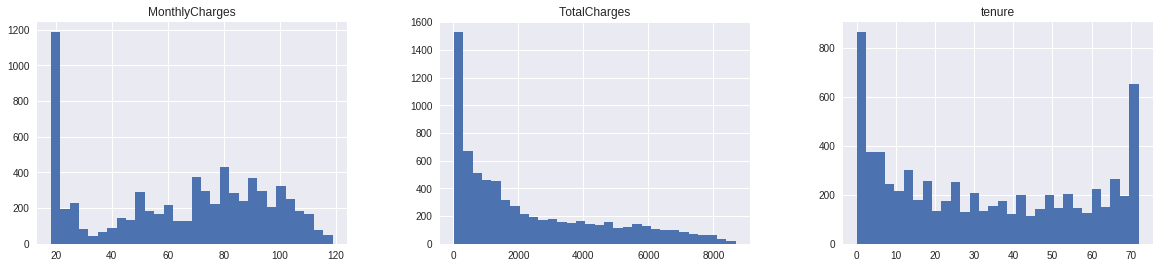

In [0]:
df_numerical[column_numerical].hist(bins=30, figsize=(20,20), layout=(4,3))
plt.show()

### Since the datpoints are skewed , we need do mathematical operations for normalizing them

###  feature Engineering 

Based on the value of the services the subscribers subscribed to, there are **yes**, **no**, and **no phone / internet service**. These are somewhat related to primary products. Examples are illustrated through *panda crosstab* function below:

1. **Phone service (Primary) and Multiple lines (Secondary)**


In [0]:
pd.crosstab(index = df["PhoneService"], columns = df["MultipleLines"])

MultipleLines,No,No phone service,Yes
PhoneService,,,
No,0,682,0
Yes,3390,0,2971


 - If the subscribers have phone service, they may have multiple lines (yes or no). 
 - But if the subscribers don't have phone service, the subscribers will never have multiple lines.
 

2. **Internet Service (Primary) and other services, let's say streaming TV (secondary)**

In [0]:
pd.crosstab(index = df["InternetService"], columns = df["StreamingTV"])

StreamingTV,No,No internet service,Yes
InternetService,,,
DSL,1464,0,957
Fiber optic,1346,0,1750
No,0,1526,0


 - If the subscribers have Internet services (either DSL or Fiber optic), the subscribers may opt to have other services related to Internet (i.e. streaming TV, device protection).
 - But if the subscribers don't have the Internet services, this secondary service will not be available for the subscribers.
 


With this conclusion, I opt to transform the feature value of **No Phone / Internet service** to be the same **No** because it can be used another features (hence, **phone service** and **internet service** column) to explain.

In [0]:
# Now Let's Start Comparing.
# Gender Vs Churn
print(pd.crosstab(df.gender,df.Churn,margins=True))

Churn     No   Yes   All
gender                  
Female  2549   939  3488
Male    2625   930  3555
All     5174  1869  7043


In [0]:
print('Percent of Females that Left the Company {0}'.format((939*100/1869)))
print('Percent of Males that Left the Company {0}'.format((930*100/1869)))

Percent of Females that Left the Company 50
Percent of Males that Left the Company 49


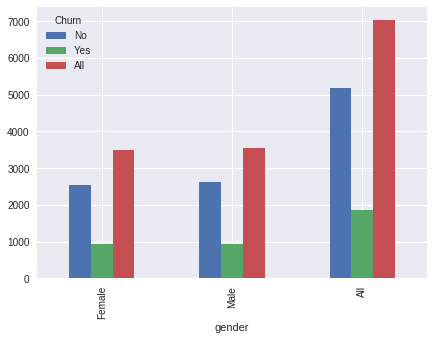

In [0]:
pd.crosstab(df.gender,df.Churn,margins=True).plot(kind='bar',figsize=(7,5))

**We can See that Gender Does'nt Play an important Role in Predicting Our Target Variable.**

In [0]:
# Contract Vs Churn
print(pd.crosstab(df.Contract,df.Churn,margins=True))

Churn             No   Yes   All
Contract                        
Month-to-month  2220  1655  3875
One year        1307   166  1473
Two year        1647    48  1695
All             5174  1869  7043


In [0]:
print('Percent of Month-to-Month Contract People that Left the Company {0}'.format((1655*100/1869)))
print('Percent of One-Year Contract People that Left the Company {0}'.format((166*100/1869))) 
print('Percent of Two-Year Contract People that Left the Company {0}'.format((48*100/1869))) 

Percent of Month-to-Month Contract People that Left the Company 88
Percent of One-Year Contract People that Left the Company 8
Percent of Two-Year Contract People that Left the Company 2


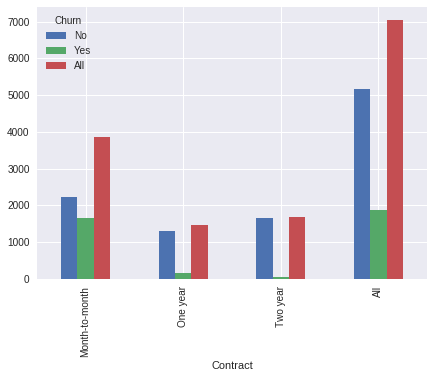

In [0]:
pd.crosstab(df.Contract,df.Churn,margins=True).plot(kind='bar',figsize=(7,5))

**Most of the People that Left were the Ones who had Month-to-Month  Contract.**

In [0]:
# Internet Service Vs Churn
print(pd.crosstab(df.InternetService,df.Churn,margins=True))

Churn              No   Yes   All
InternetService                  
DSL              1962   459  2421
Fiber optic      1799  1297  3096
No               1413   113  1526
All              5174  1869  7043


In [0]:
print('Percent of DSL Internet-Service People that Left the Company {0}'.format((459*100/1869)))
print('Percent of Fiber Optic Internet-Service People that Left the Company {0}'.format((1297*100/1869))) 
print('Percent of No Internet-Service People that Left the Company {0}'.format((113*100/1869)))

Percent of DSL Internet-Service People that Left the Company 24
Percent of Fiber Optic Internet-Service People that Left the Company 69
Percent of No Internet-Service People that Left the Company 6


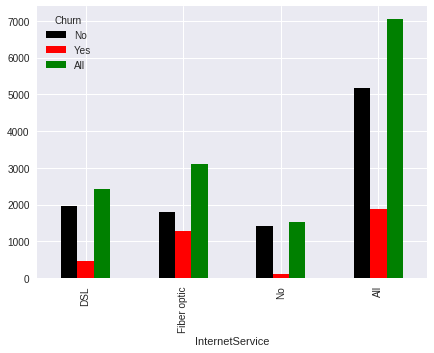

In [0]:
pd.crosstab(df.InternetService,df.Churn,margins=True).plot(kind='bar',figsize=(7,5), color=['black', 'red', 'green', 'blue', 'cyan']);     

**Most of the people That Left had Fiber Optic Internet-Service.**

In [0]:
# Partner Vs Dependents
print(pd.crosstab(df.Partner,df.Dependents,margins=True))

Dependents    No   Yes   All
Partner                     
No          3280   361  3641
Yes         1653  1749  3402
All         4933  2110  7043


In [0]:
print('Percent of Partner that had Dependents {0}'.format((1749*100/2110)))
print('Percent of Non-Partner that had Dependents {0}'.format((361*100/2110)))

Percent of Partner that had Dependents 82
Percent of Non-Partner that had Dependents 17


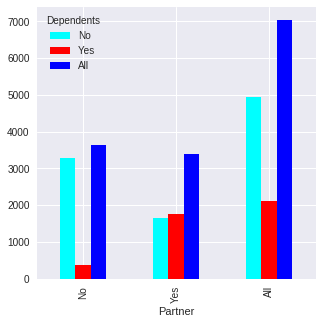

In [0]:
pd.crosstab(df.Partner,df.Dependents,margins=True).plot(kind='bar',figsize=(5,5), color =['cyan', 'red', 'blue'])

**We can See Partners had a much larger percent of Dependents than Non-Partner this tells us that Most Partners might be Married.**

Churn      No   Yes   All
Partner                  
No       2441  1200  3641
Yes      2733   669  3402
All      5174  1869  7043


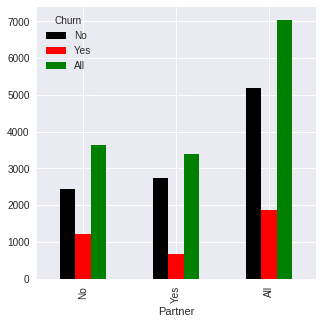

In [0]:
# Partner Vs Churn
print(pd.crosstab(df.Partner,df.Churn,margins=True))
pd.crosstab(df.Partner,df.Churn,margins=True).plot(kind='bar',figsize=(5,5), color =['black', 'red', 'green'] );

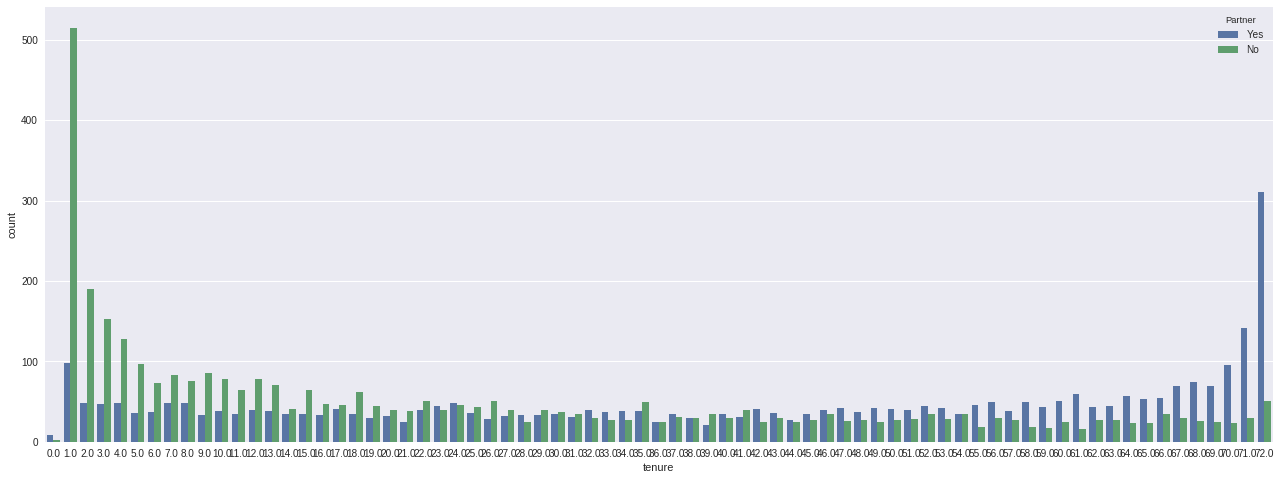

In [0]:
plt.figure(figsize=(22,8))
sns.countplot(x=df['tenure'],hue=df.Partner);

**Most of the People that Were Partner will Stay Longer with The Company. So Being a Partner is a Plus-Point For the Company as they will Stay Longer with Them.**

Churn      No   Yes   All
Partner                  
No       2441  1200  3641
Yes      2733   669  3402
All      5174  1869  7043


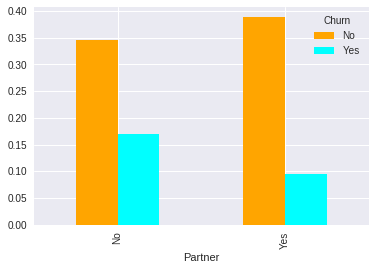

In [0]:
# Partner Vs Churn
print(pd.crosstab(df.Partner,df.Churn,margins=True))
pd.crosstab(df.Partner,df.Churn,normalize=True).plot(kind='bar',color=['orange', 'cyan','black', 'red', 'green']);

In [0]:
print('Percent of Partner that Churn {0}'.format((669*100/3402)))
print('Percent of Non-Partner that Churn {0}'.format((1200*100/3641)))

Percent of Partner that Churn 19
Percent of Non-Partner that Churn 32


### It is clearly seen that percentage of Churn Out is more in Non-Partner cases

Churn            No   Yes   All
SeniorCitizen                  
0              4508  1393  5901
1               666   476  1142
All            5174  1869  7043


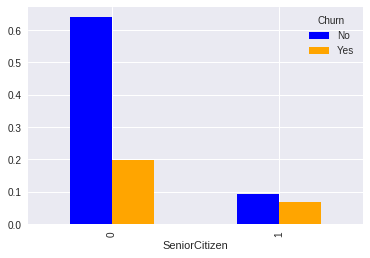

In [0]:
# Senior Citizen Vs Churn
print(pd.crosstab(df.SeniorCitizen,df.Churn,margins=True))
pd.crosstab(df.SeniorCitizen,df.Churn,normalize=True).plot(kind='bar', color = ['blue','orange']);

In [0]:
print('Percent of Senior Citizen that Churn {0}'.format((476*100/1142)))
print('Percent of Non-Senior Citizen that Churn {0}'.format((1393*100/5901)))

Percent of Senior Citizen that Churn 41
Percent of Non-Senior Citizen that Churn 23


### Churn Out percentage is more in case of Senior Citizens. Company should design attractive plans for senior citizen for retention.

## Let's Check for Outliers if any

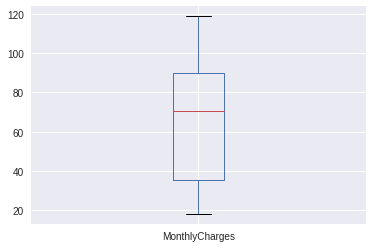

In [0]:
df.boxplot('MonthlyCharges')

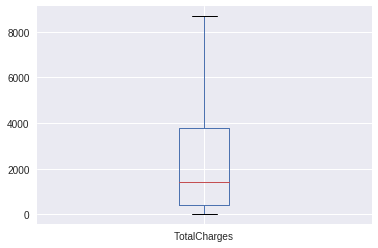

In [0]:
df.boxplot('TotalCharges')

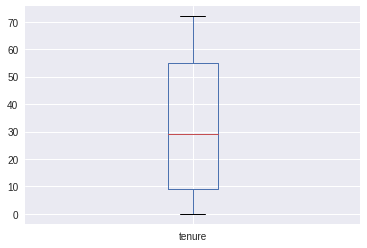

In [0]:
df.boxplot('tenure')

**Monthly Charges , Total Charges and Tenure don't have any Outliers so we don't have to Get into Extracting Information from Outliers.**

## Bi-Variate

## Correlation

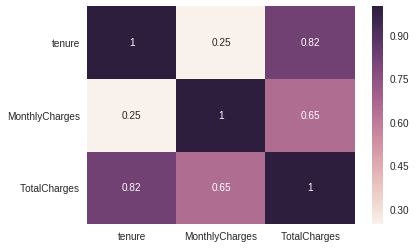

In [0]:
# Checking correlation 

sns.heatmap(df.corr(),xticklabels=df.corr().columns.values,yticklabels=df.corr().columns.values,annot=True);

**Here We can See Tenure and Total Charges are correlated and also Monthly charges and Total Charges are also correlated with each other.**

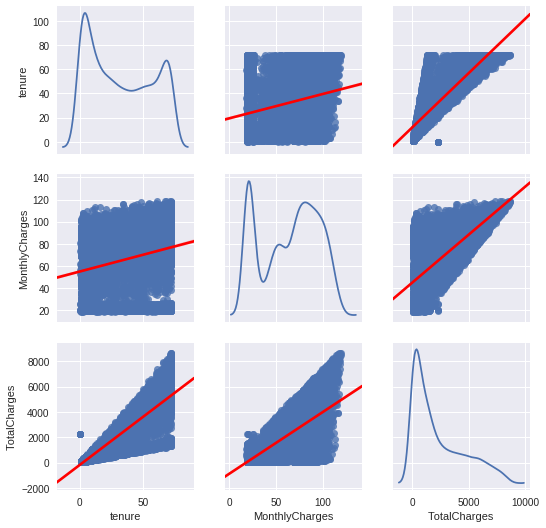

In [0]:
sns.pairplot(df_numerical,kind ='reg',diag_kind='kde',plot_kws={'line_kws':{'color':'red'}} )

### Since the datapoints are skewed, we need to do normalizing steps

## <a id='9.4'> Bucketing </a>

In [0]:
#Tenure to categorical column
def tenure_lab(telcom) :
    
    if telcom["tenure"] <= 12 :
        return "Tenure_0-12"
    elif (telcom["tenure"] > 12) & (telcom["tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (telcom["tenure"] > 24) & (telcom["tenure"] <= 48) :
        return "Tenure_24-48"
    elif (telcom["tenure"] > 48) & (telcom["tenure"] <= 60) :
        return "Tenure_48-60"
    elif telcom["tenure"] > 60 :
        return "Tenure_gt_60"
    
    
df["tenure_group"] = df.apply(lambda x:tenure_lab(x),axis = 1)

In [0]:
df['tenure_group'].head()

0     Tenure_0-12
1    Tenure_24-48
2     Tenure_0-12
3    Tenure_24-48
4     Tenure_0-12
Name: tenure_group, dtype: object

# <a id='10'>10. Data preprocessing </a>

## <a id='10.1'> Encoding categorical variable </a>

In [0]:
#replace values
df["SeniorCitizen"] = df["SeniorCitizen"].replace({1:"Yes",0:"No"})

In [0]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#customer id col
Id_col     = ['customerID']
#Target columns
target_col = ["Churn"]


#categorical columns
cat_cols   = df.nunique()[df.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
#numerical columns
num_cols   = [x for x in df.columns if x not in cat_cols + target_col + Id_col]
#Binary columns with 2 values
bin_cols   = df.nunique()[df.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    df[i] = le.fit_transform(df[i])
    
#Duplicating columns for multi value columns
df = pd.get_dummies(data = df,columns = multi_cols )

In [0]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,...,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60
0,7590-VHVEG,0,0,1,0,1.0,0,1,29.85,29.85,...,0,0,0,1,0,1,0,0,0,0
1,5575-GNVDE,1,0,0,0,34.0,1,0,56.95,1889.50,...,0,0,0,0,1,0,0,1,0,0
2,3668-QPYBK,1,0,0,0,2.0,1,1,53.85,108.15,...,0,0,0,0,1,1,0,0,0,0
3,7795-CFOCW,1,0,0,0,45.0,0,0,42.30,1840.75,...,0,1,0,0,0,0,0,1,0,0
4,9237-HQITU,0,0,0,0,2.0,1,1,70.70,151.65,...,0,0,0,1,0,1,0,0,0,0


## <a id='10.2'> Normalizing features </a>

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
telcom = df
telcom = telcom.drop('customerID', axis=1)
#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(telcom[column_numerical])
scaled = pd.DataFrame(scaled,columns=column_numerical)

#dropping original values merging scaled values for numerical columns
df_telcom_og = telcom.copy()
telcom = telcom.drop(columns = column_numerical,axis = 1)
telcom = telcom.merge(scaled,left_index=True,right_index=True,how = "left")

In [0]:
telcom.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,...,PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,1,0,0,1,0,...,1,0,1,0,0,0,0,-1.277445,-1.160323,-0.994971
1,1,0,0,0,1,0,0,1,0,0,...,0,1,0,0,1,0,0,0.066327,-0.259629,-0.173876
2,1,0,0,0,1,1,1,1,0,0,...,0,1,1,0,0,0,0,-1.236724,-0.362660,-0.960399
3,1,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0.514251,-0.746535,-0.195400
4,0,0,0,0,1,1,1,1,0,0,...,1,0,1,0,0,0,0,-1.236724,0.197365,-0.941193


## <a id='10.3'> spliting train/val/test data </a>

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve,scorer
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
from yellowbrick.classifier import DiscriminationThreshold
#splitting train and test data 

target_col = telcom["Churn"]

train,test = train_test_split(telcom,test_size = .25 ,random_state = 111)
    
##seperating dependent and independent variables
cols    = [i for i in telcom.columns if i != "Churn"]
X_train = train[cols]
y_train = train["Churn"]
X_test  = test[cols]
y_test  = test["Churn"]

# <a id='11'>11. Model Building </a>

In [0]:
from sklearn.dummy import DummyClassifier

# Feature Selection and Encoding
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning 
from sklearn import tree , linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier

In [0]:
# validation 
from sklearn import datasets, model_selection, metrics , preprocessing

In [0]:
# Grid and Random Search
import scipy.stats as st
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [0]:
# Metrics
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc

In [0]:
#utilities
import time
import io, os, sys, types, time, datetime, math, random

In [0]:
# calculate the fpr and tpr for all thresholds of the classification
def plot_roc_curve(y_test, preds):
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

    

# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, X_test, cv):
    # One Pass
    model = algo.fit(X_train, y_train)
    test_pred = model.predict(X_test)
    if (isinstance(algo, (LogisticRegression, 
                          KNeighborsClassifier, 
                          GaussianNB, 
                          DecisionTreeClassifier, 
                          RandomForestClassifier,
                          GradientBoostingClassifier))):
        probs = model.predict_proba(X_test)[:,1]
    else:
        probs = "Not Available"
    acc = round(model.score(X_test, y_test) * 100, 2) 
    # CV 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    return train_pred, test_pred, acc, acc_cv, probs

# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            

### <a id='11.1'> Baseline model with DummyClassifier</a>

In [0]:
clf = DummyClassifier(strategy='most_frequent',random_state=0)
clf.fit(X_train, y_train)

DummyClassifier(constant=None, random_state=0, strategy='most_frequent')

In [0]:
accuracy = clf.score(X_test, y_test)  
accuracy

0.7535491198182851

In [0]:
preds = clf.predict(X_test)


# dummyistic Regression
start_time = time.time()
train_pred_dummy, test_pred_dummy, acc_dummy, acc_cv_dummy, probs_dummy = fit_ml_algo(DummyClassifier(strategy='most_frequent',random_state=0), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
dummy_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dummy)
print("Accuracy CV 10-Fold: %s" % acc_cv_dummy)
print("Running Time: %s" % datetime.timedelta(seconds=dummy_time))

print (metrics.classification_report(y_train, train_pred_dummy))

print (metrics.classification_report(y_test, test_pred_dummy))


Accuracy: 75.35
Accuracy CV 10-Fold: 72.83
Running Time: 0:00:01.851991
              precision    recall  f1-score   support

           0       0.73      1.00      0.84      3847
           1       0.00      0.00      0.00      1435

   micro avg       0.73      0.73      0.73      5282
   macro avg       0.36      0.50      0.42      5282
weighted avg       0.53      0.73      0.61      5282

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      1327
           1       0.00      0.00      0.00       434

   micro avg       0.75      0.75      0.75      1761
   macro avg       0.38      0.50      0.43      1761
weighted avg       0.57      0.75      0.65      1761



## Select Candidate Algorithms

### 1. KNN
### 2. Logistic Regression
### 3. Random Forest
### 4. Naive Bayes
### 5. Stochastic Gradient Decent
### 6. Linear SVC
### 7. Decision Tree
### 8. Gradient Boosted Trees

In [0]:
# Specify parameters and distributions to sample from
param_dist = {'penalty': ['l2', 'l1'], 
                         'class_weight': [None, 'balanced'],
                         'C': np.logspace(-20, 20, 10000), 
                         'intercept_scaling': np.logspace(-20, 20, 10000)}



# Run Randomized Search
n_iter_search = 10
lrc = LogisticRegression()
random_search = RandomizedSearchCV(lrc, 
                                   n_jobs=-1, 
                                   param_distributions=param_dist, 
                                   n_iter=n_iter_search)

start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 13.01 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.796 (std: 0.004)
Parameters: {'penalty': 'l2', 'C': 415.20428433462905, 'intercept_scaling': 1.2254873450438764e-17, 'class_weight': None}

Model with rank: 2
Mean validation score: 0.796 (std: 0.005)
Parameters: {'penalty': 'l1', 'C': 2.5109610962791613e+18, 'intercept_scaling': 0.4549522283913487, 'class_weight': None}

Model with rank: 3
Mean validation score: 0.743 (std: 0.003)
Parameters: {'penalty': 'l1', 'C': 110510702695769.2, 'intercept_scaling': 1428615940.0879962, 'class_weight': 'balanced'}

Model with rank: 3
Mean validation score: 0.743 (std: 0.003)
Parameters: {'penalty': 'l1', 'C': 1166558951.823186, 'intercept_scaling': 1428615940.0879962, 'class_weight': 'balanced'}

Model with rank: 5
Mean validation score: 0.728 (std: 0.000)
Parameters: {'penalty': 'l1', 'C': 1.2064467305107723e-05, 'intercept_scaling': 4.696422680374071e+17, 'class_weight': 'balan

### Logistic Regression

Accuracy: 80.86
Accuracy CV 10-Fold: 80.25
Running Time: 0:00:00.541680
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      3847
           1       0.67      0.54      0.60      1435

   micro avg       0.80      0.80      0.80      5282
   macro avg       0.76      0.72      0.73      5282
weighted avg       0.79      0.80      0.79      5282

              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1327
           1       0.62      0.56      0.59       434

   micro avg       0.81      0.81      0.81      1761
   macro avg       0.74      0.73      0.73      1761
weighted avg       0.80      0.81      0.81      1761



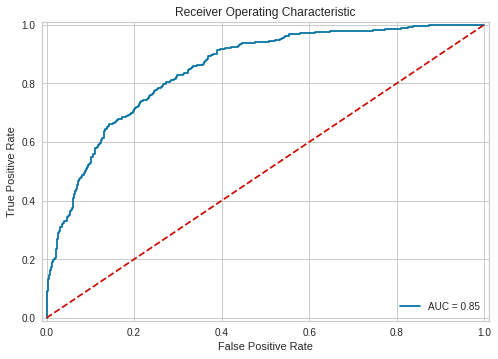

In [0]:
# Logistic Regression
start_time = time.time()
train_pred_log, test_pred_log, acc_log, acc_cv_log, probs_log = fit_ml_algo(LogisticRegression(n_jobs = -1), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

print (metrics.classification_report(y_train, train_pred_log))

print (metrics.classification_report(y_test, test_pred_log))

plot_roc_curve(y_test, probs_log)

### K- Nearest Neighbors

Accuracy: 74.96
Accuracy CV 10-Fold: 75.43
Running Time: 0:00:02.093915
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      3847
           1       0.55      0.52      0.54      1435

   micro avg       0.75      0.75      0.75      5282
   macro avg       0.69      0.68      0.68      5282
weighted avg       0.75      0.75      0.75      5282

              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1327
           1       0.49      0.53      0.51       434

   micro avg       0.75      0.75      0.75      1761
   macro avg       0.67      0.67      0.67      1761
weighted avg       0.76      0.75      0.75      1761



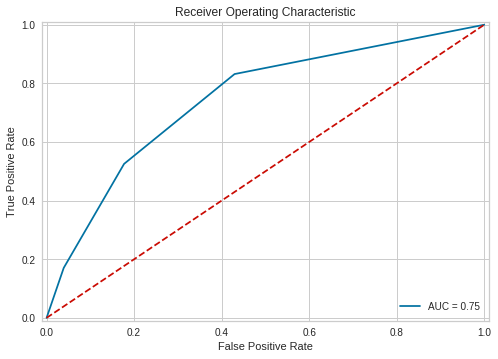

In [0]:
# k-Nearest Neighbors
start_time = time.time()
train_pred_knn, test_pred_knn, acc_knn, acc_cv_knn, probs_knn = fit_ml_algo(KNeighborsClassifier(n_neighbors = 3,
                                                                                                 n_jobs = -1), 
                                                                                                 X_train, 
                                                                                                 y_train, 
                                                                                                 X_test, 
                                                                                                 10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

print (metrics.classification_report(y_train, train_pred_knn))

print (metrics.classification_report(y_test, test_pred_knn))

plot_roc_curve(y_test, probs_knn)

### Gaussian Naive Bayes

Accuracy: 70.13
Accuracy CV 10-Fold: 70.54
Running Time: 0:00:00.117162
              precision    recall  f1-score   support

           0       0.91      0.66      0.77      3847
           1       0.48      0.82      0.60      1435

   micro avg       0.71      0.71      0.71      5282
   macro avg       0.69      0.74      0.68      5282
weighted avg       0.79      0.71      0.72      5282

              precision    recall  f1-score   support

           0       0.94      0.65      0.77      1327
           1       0.45      0.87      0.59       434

   micro avg       0.70      0.70      0.70      1761
   macro avg       0.69      0.76      0.68      1761
weighted avg       0.82      0.70      0.72      1761



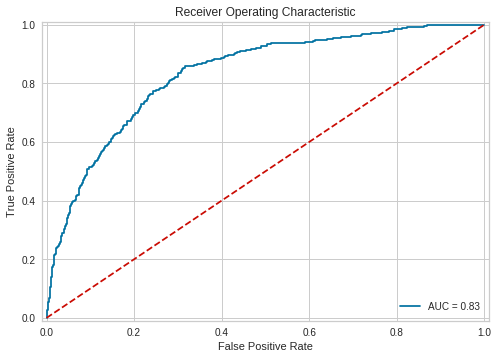

In [0]:
# Gaussian Naive Bayes
start_time = time.time()
train_pred_gaussian, test_pred_gaussian, acc_gaussian, acc_cv_gaussian, probs_gau = fit_ml_algo(GaussianNB(), 
                                                                                     X_train, 
                                                                                     y_train, 
                                                                                     X_test, 
                                                                                     10)
gaussian_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gaussian)
print("Accuracy CV 10-Fold: %s" % acc_cv_gaussian)
print("Running Time: %s" % datetime.timedelta(seconds=gaussian_time))

print (metrics.classification_report(y_train, train_pred_gaussian)) 

print (metrics.classification_report(y_test, test_pred_gaussian)) 

plot_roc_curve(y_test, probs_gau)

### Decision Tree Classifier

Accuracy: 74.28
Accuracy CV 10-Fold: 72.4
Running Time: 0:00:00.376805
              precision    recall  f1-score   support

           0       0.81      0.81      0.81      3847
           1       0.49      0.50      0.50      1435

   micro avg       0.72      0.72      0.72      5282
   macro avg       0.65      0.65      0.65      5282
weighted avg       0.73      0.72      0.72      5282

              precision    recall  f1-score   support

           0       0.85      0.81      0.83      1327
           1       0.48      0.55      0.51       434

   micro avg       0.74      0.74      0.74      1761
   macro avg       0.66      0.68      0.67      1761
weighted avg       0.76      0.74      0.75      1761



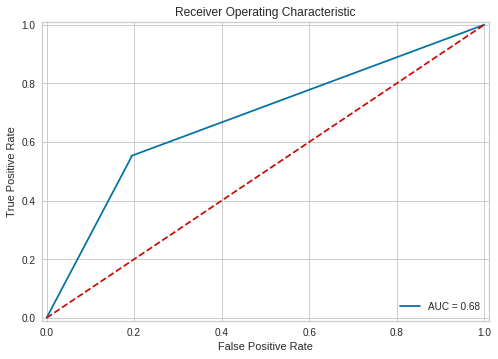

In [0]:
# Decision Tree Classifier
start_time = time.time()
train_pred_dt, test_pred_dt, acc_dt, acc_cv_dt, probs_dt = fit_ml_algo(DecisionTreeClassifier(), 
                                                             X_train, 
                                                             y_train, 
                                                             X_test, 
                                                             10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

print (metrics.classification_report(y_train, train_pred_dt))

print (metrics.classification_report(y_test, test_pred_dt))

plot_roc_curve(y_test, probs_dt)

### Random Forest Classifier

In [0]:
# Random Forest Classifier - Random Search for Hyperparameters

# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
# Specify parameters and distributions to sample from
param_dist = {"max_depth": [10, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 20),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}


# Run Randomized Search
n_iter_search = 10
rfc = RandomForestClassifier(n_estimators=10)
random_search = RandomizedSearchCV(rfc, 
                                   n_jobs = -1, 
                                   param_distributions=param_dist, 
                                   n_iter=n_iter_search)

start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 1.86 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.800 (std: 0.001)
Parameters: {'bootstrap': False, 'min_samples_leaf': 5, 'min_samples_split': 16, 'criterion': 'gini', 'max_features': 3, 'max_depth': None}

Model with rank: 2
Mean validation score: 0.796 (std: 0.001)
Parameters: {'bootstrap': True, 'min_samples_leaf': 9, 'min_samples_split': 13, 'criterion': 'entropy', 'max_features': 8, 'max_depth': 10}

Model with rank: 3
Mean validation score: 0.794 (std: 0.003)
Parameters: {'bootstrap': True, 'min_samples_leaf': 8, 'min_samples_split': 11, 'criterion': 'entropy', 'max_features': 10, 'max_depth': None}

Model with rank: 3
Mean validation score: 0.794 (std: 0.003)
Parameters: {'bootstrap': False, 'min_samples_leaf': 8, 'min_samples_split': 5, 'criterion': 'entropy', 'max_features': 6, 'max_depth': None}

Model with rank: 5
Mean validation score: 0.794 (std: 0.008)
Parameters: {'bootstrap': True, 'min_samples_leaf':

Accuracy: 80.47
Accuracy CV 10-Fold: 79.42
Running Time: 0:00:00.680967
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      3847
           1       0.66      0.51      0.57      1435

   micro avg       0.79      0.79      0.79      5282
   macro avg       0.74      0.71      0.72      5282
weighted avg       0.78      0.79      0.79      5282

              precision    recall  f1-score   support

           0       0.86      0.89      0.87      1327
           1       0.62      0.55      0.58       434

   micro avg       0.80      0.80      0.80      1761
   macro avg       0.74      0.72      0.73      1761
weighted avg       0.80      0.80      0.80      1761



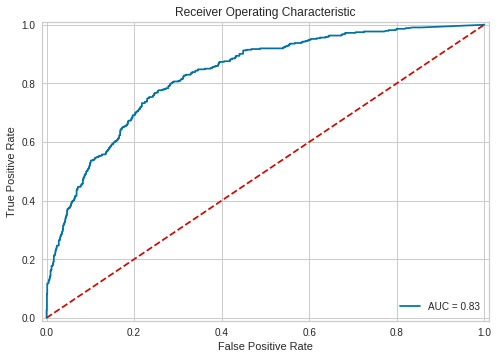

In [0]:
# Random Forest Classifier
start_time = time.time()
rfc = RandomForestClassifier(n_estimators=10, 
                             min_samples_leaf=2,
                             min_samples_split=17, 
                             criterion='gini', 
                             max_features=8)
train_pred_rf, test_pred_rf, acc_rf, acc_cv_rf, probs_rf = fit_ml_algo(rfc, 
                                                             X_train, 
                                                             y_train, 
                                                             X_test, 
                                                             10)
rf_time = (time.time() - start_time)
print("Accuracy: %s" % acc_rf)
print("Accuracy CV 10-Fold: %s" % acc_cv_rf)
print("Running Time: %s" % datetime.timedelta(seconds=rf_time))

print (metrics.classification_report(y_train, train_pred_rf)) 

print (metrics.classification_report(y_test, test_pred_rf))

plot_roc_curve(y_test, probs_rf)

### Gradient Boosting Trees

Accuracy: 80.52
Accuracy CV 10-Fold: 80.25
Running Time: 0:00:06.894962
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      3847
           1       0.67      0.54      0.60      1435

   micro avg       0.80      0.80      0.80      5282
   macro avg       0.75      0.72      0.73      5282
weighted avg       0.79      0.80      0.80      5282

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1327
           1       0.61      0.56      0.59       434

   micro avg       0.81      0.81      0.81      1761
   macro avg       0.74      0.72      0.73      1761
weighted avg       0.80      0.81      0.80      1761



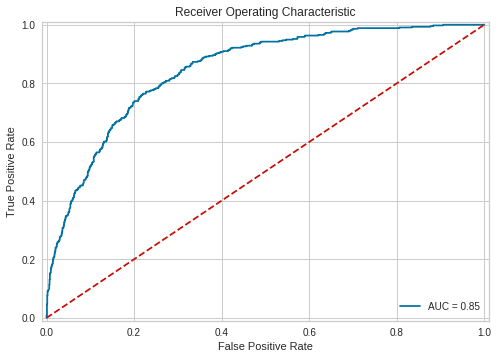

In [0]:
# Gradient Boosting Trees
start_time = time.time()
train_pred_gbt, test_pred_gbt, acc_gbt, acc_cv_gbt, probs_gbt = fit_ml_algo(GradientBoostingClassifier(), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, 
                                                                 10)
gbt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_gbt)
print("Accuracy CV 10-Fold: %s" % acc_cv_gbt)
print("Running Time: %s" % datetime.timedelta(seconds=gbt_time))

print (metrics.classification_report(y_train, train_pred_gbt)) 

print (metrics.classification_report(y_test, test_pred_gbt))

plot_roc_curve(y_test, probs_gbt)

In [0]:
def xgb_f1(y, t):
    #
    # Function to evaluate the prediction based on F1 score, this will be used as evaluation metric when training xgboost model
    # Args:
    #   y: label
    #   t: predicted
    #
    # Return:
    #   f1: F1 score of the actual and predicted
    #
    t = t.get_label()
    y_bin = [1. if y_cont > 0.5 else 0. for y_cont in y]   # change the prob to class output
    return 'f1', f1_score(t, y_bin)

best_xgb = XGBClassifier(objective = 'binary:logistic',
                         colsample_bylevel = 0.7,
                         colsample_bytree = 0.8,
                         gamma = 1,
                         learning_rate = 0.15,
                         max_delta_step = 3,
                         max_depth = 4,
                         min_child_weight = 1,
                         n_estimators = 50,
                         reg_lambda = 10,
                         scale_pos_weight = 1.5,
                         subsample = 0.9,
                         silent = False,
                         n_jobs = 4
                        )

xgbst = best_xgb.fit(X_train, y_train, eval_metric = xgb_f1, eval_set = [(X_train, y_train), (X_test, y_test)], 
             early_stopping_rounds = 20)

[0]	validation_0-error:0.227187	validation_1-error:0.20954	validation_0-f1:0.604222	validation_1-f1:0.612802
Multiple eval metrics have been passed: 'validation_1-f1' will be used for early stopping.

Will train until validation_1-f1 hasn't improved in 20 rounds.
[1]	validation_0-error:0.20674	validation_1-error:0.198751	validation_0-f1:0.625771	validation_1-f1:0.62039
[2]	validation_0-error:0.216774	validation_1-error:0.218626	validation_0-f1:0.638459	validation_1-f1:0.619189
[3]	validation_0-error:0.213177	validation_1-error:0.220329	validation_0-f1:0.645243	validation_1-f1:0.61811
[4]	validation_0-error:0.20939	validation_1-error:0.220329	validation_0-f1:0.65	validation_1-f1:0.619608
[5]	validation_0-error:0.207119	validation_1-error:0.220897	validation_0-f1:0.645266	validation_1-f1:0.609045
[6]	validation_0-error:0.207686	validation_1-error:0.211244	validation_0-f1:0.640446	validation_1-f1:0.61807
[7]	validation_0-error:0.204468	validation_1-error:0.216922	validation_0-f1:0.643093	

In [0]:
train_pred_xgbst, test_pred_xgbst, acc_xgbst, acc_cv_xgbst, probs_xgbst = fit_ml_algo(xgbst, 
                                                             X_train, 
                                                             y_train, 
                                                             X_test, 
                                                             10)

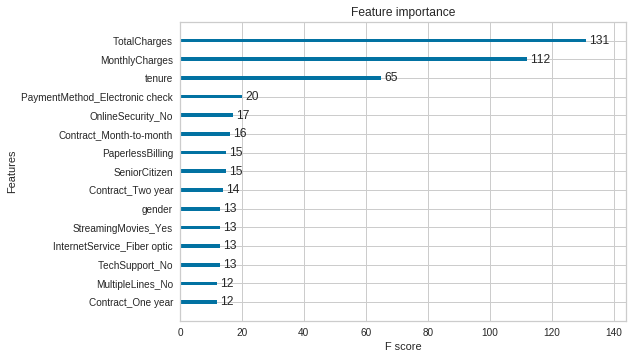

In [0]:
import xgboost as xgb
xgb.plot_importance(best_xgb, max_num_features = 15)
plt.show();

## <a id='' > Compare all models & Conclusion </a>

### To compare we first plot the AUC

In [0]:

models = [
    'KNN', 
    'Logistic Regression', 
    'Random Forest', 
    'Naive Bayes', 
    'Decision Tree', 
    'Gradient Boosting Trees',
    
]
probs = [
    probs_knn,
    probs_log,
    probs_rf,
    probs_gau,
    probs_dt,
    probs_gbt
]
colors = [
    'blue',
    'green',
    'red',
    'cyan',
    'magenta',
    'yellow',
    'black',
]

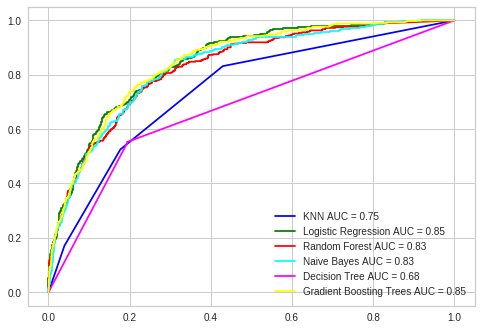

In [0]:
def plot_roc_curves(y_test, prob, model):
    fpr, tpr, threshold = metrics.roc_curve(y_test, prob)
    roc_auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, 'b', label = model + ' AUC = %0.2f' % roc_auc, color=colors[i])
    plt.legend(loc = 'lower right')
    
for i, model in list(enumerate(models)):
    plot_roc_curves(y_test, probs[i], models[i])
    
plt.show()

AUC ;Area under the ROC Curve measures the entire two-dimensional area underneath the entire ROC curve from (0,0) to (1,1). AUC provides an aggregate measure of performance across all possible classification thresholds. It is the probability that the model ranks a random positive example more highly than a random negative example. AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.

### Here we can see that Logistic Regression, Gradient Boosting Trees , Random Forest and Naive Bayes are to choose from where AUC is higher

In [0]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 
              'Decision Tree', 'Gradient Boosting Trees'],
    'Score': [
        acc_knn, acc_log, acc_rf, 
        acc_gaussian, acc_dt, acc_gbt],
        
     'Log_Loss' : [
        datetime.timedelta(seconds=knn_time),
        datetime.timedelta(seconds=log_time),
        datetime.timedelta(seconds=rf_time),
        datetime.timedelta(seconds=gaussian_time),
        datetime.timedelta(seconds=dt_time),
        datetime.timedelta(seconds=gbt_time)],        
    })
models.sort_values(by=['Score','Log_Loss'], ascending=False)


,Log_Loss,Model,Score
1,00:00:00.541680,Logistic Regression,80.86
5,00:00:06.894962,Gradient Boosting Trees,80.52
2,00:00:00.680967,Random Forest,80.47
0,00:00:02.093915,KNN,74.96
4,00:00:00.376805,Decision Tree,74.28
3,00:00:00.117162,Naive Bayes,70.13


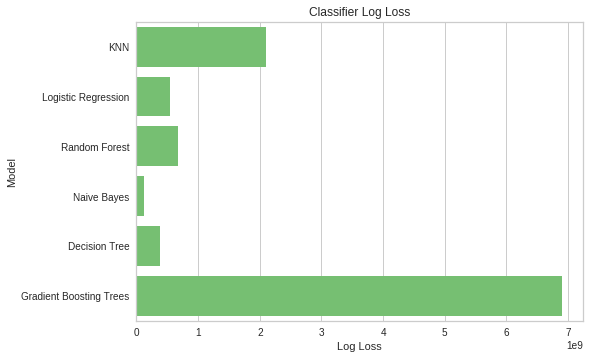

In [0]:
sns.set_color_codes("muted")
sns.barplot(x='Log_Loss', y='Model', data=models, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

## Conclusion 

### Logistic Regression is having advantage over the others with higher AUC, lower Log Loss. With its simple in nature and would be useful in production because of lower loss. I choose the " Logistic Regression" model for the given dataset.


